Chouchane Yosra  

# importing libraries 


In [721]:
import pandas_datareader.data as web 
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt 
import numpy as np
import mplfinance as mpf
import pandas as pd 


# for reading stock data from yahoo:
from pandas_datareader.data import DataReader

# for plotting correlation :
from pandas.plotting import scatter_matrix

# to remove warnings :
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline


# ANALYSIS OF THE COMMUNICATION SECTOR'S STOCKS

I will work with the Fastest-Growing Communications Stocks ( Google,Facebook and TMobile ) in the period of 3 years from 2016 to 2019 respectively :
    
      
  **Alphabet Inc.: Alphabet is a holding company and the parent company of Google. Through subsidiaries, the company provides 
    web-based search, maps, software, mobile operating systems, advertisements, consumer content, and more. Notethat
    this listing refers to the company's Class A shares.
        
 **Facebook Inc.: Facebook operates the world's largest social networking website, which facilities the sharing of information, 
    photos, videos, and website links.
        
  **T-Mobile US Inc.: T-Mobile is a leading telecommunications services company and national wireless carrier. The company 
    offers business, consumer, and prepaid options as well as data plans.
   
        
 

In [722]:
start = datetime.datetime(2016,1,1)

end   = datetime.datetime(2022,1,1)

In [723]:
google   = web.DataReader("GOOGL",'yahoo',start,end)

facebook = web.DataReader("FB",'yahoo',start,end)

Tmobile  = web.DataReader("TMUS",'yahoo',start,end)

In [724]:
#detecting missing values:

google.isna().any()

facebook.isna().any()

Tmobile.isna().any()


High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [725]:
#returnig  the number of missing values in each column:

google.isna().any().sum()

facebook.isna().any().sum()

Tmobile.isna().any().sum()

0

In [726]:
# download the data as csv file :

google.to_csv('google_stock.csv')

facebook.to_csv('facebook_stock.csv')

Tmobile.to_csv('Tmobile_stock.csv')

In [727]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100,759.440002
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800,761.530029
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300,759.330017
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600,741.000000
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300,730.909973


In [728]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,1342.343049,1317.330273,1329.897922,1330.450742,1.778167e+06,1330.450742
std,592.944096,582.604731,587.832864,588.203386,8.552484e+05,588.203386
min,683.330017,672.659973,682.489990,681.140015,4.656000e+05,681.140015
25%,952.824982,940.214996,947.485016,947.595001,1.245300e+06,947.595001
50%,1153.239990,1131.400024,1143.699951,1145.170044,1.545700e+06,1145.170044
75%,1489.200012,1461.274963,1475.825012,1479.315002,2.013450e+06,1479.315002
max,3019.330078,2977.979980,2999.510010,2996.770020,7.039900e+06,2996.770020


# the communication stocks list we'll use for this analysis =

In [729]:
communication_list = ['Google', 'Facebook','TMobile']

company_list       = [google ,facebook, Tmobile]

# plotting the data =

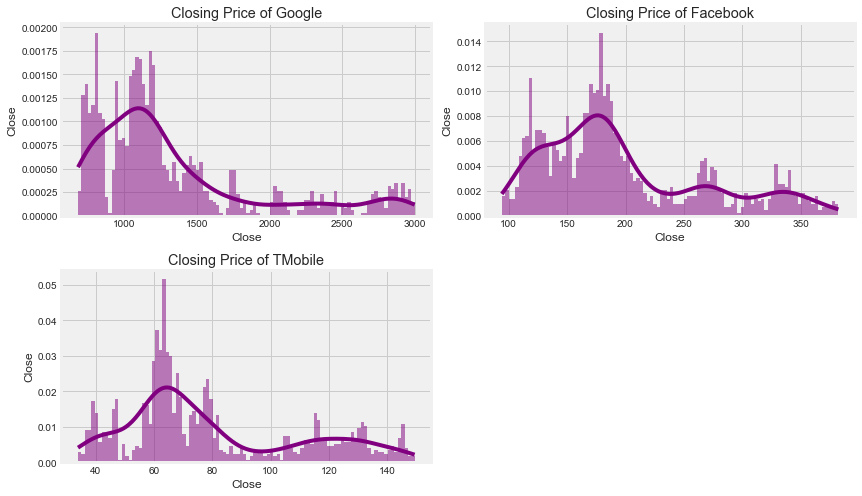

In [730]:
# plotting the hist of closing prices of stocks:

plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Close'].dropna(), bins=100, color='purple',kde=True, stat="density", linewidth=0)
    plt.ylabel('Close')
    plt.title(f"Closing Price of {communication_list[i - 1]}")


plt.tight_layout()

# market cap =

note: this is not the real market cap this is  a visual one

In [731]:
# calculating the total traded for a more precised analysis:

facebook['total traded'] = facebook['Open'] * facebook['Volume']

google['total traded']   = google['Open'] * google['Volume']

Tmobile['total traded']  = Tmobile['Open']* Tmobile['Volume']

In [732]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,total traded
Date,,,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100,759.440002,2.567928e+09
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800,761.530029,1.727477e+09
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300,759.330017,1.808617e+09
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600,741.000000,2.356370e+09
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300,730.909973,1.776249e+09


Text(0.5, 1.0, ' The Total Traded of Google,Facebook,T Mobile')

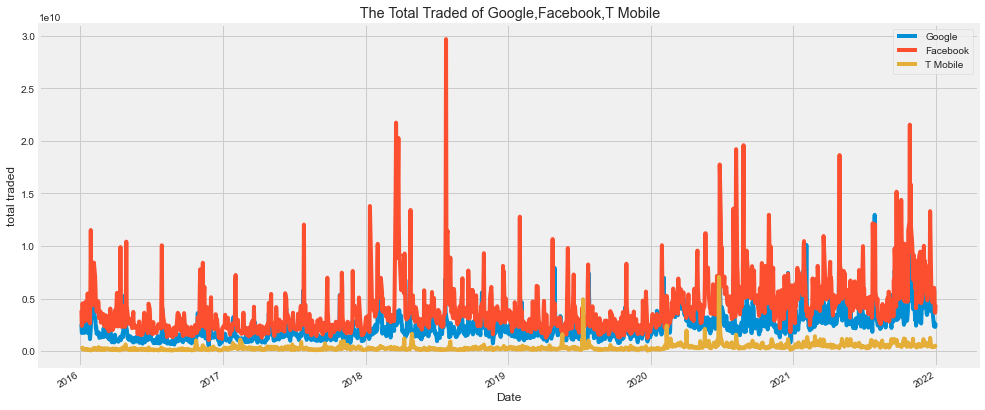

In [733]:
# plotting the total traded :

google['total traded'].plot(label='Google',figsize=(15,7))

facebook['total traded'].plot(label='Facebook')

Tmobile['total traded'].plot(label='T Mobile')


plt.ylabel('total traded')
plt.legend()
plt.title(' The Total Traded of Google,Facebook,T Mobile')

we've noticed that Facebook stock have a high pic between 2018-07 and 2019-01 we wanted to know if it is caused by the volume or the open price 

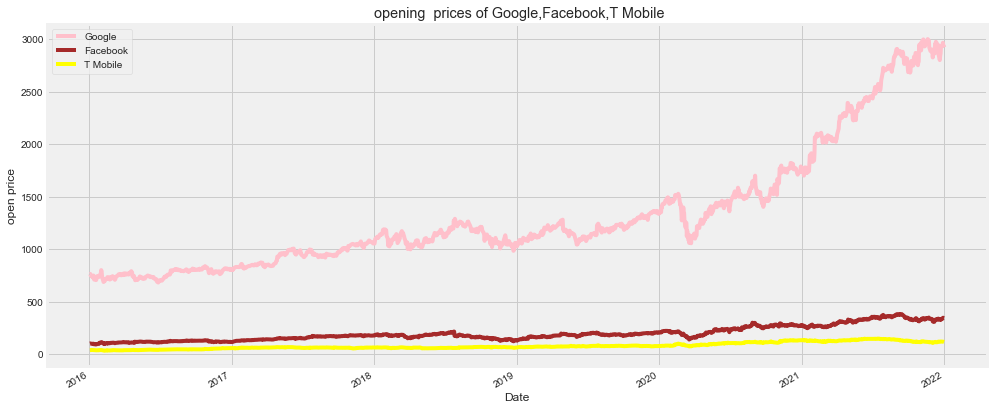

In [734]:
# plotting the historical view of opening prices:

google['Open'].plot(label='Google',figsize=(15,7),color='pink')

facebook['Open'].plot(label='Facebook',color='brown')

Tmobile['Open'].plot(label='T Mobile',color='yellow')

plt.ylabel('open price')
plt.title(' opening  prices of Google,Facebook,T Mobile')
plt.legend()


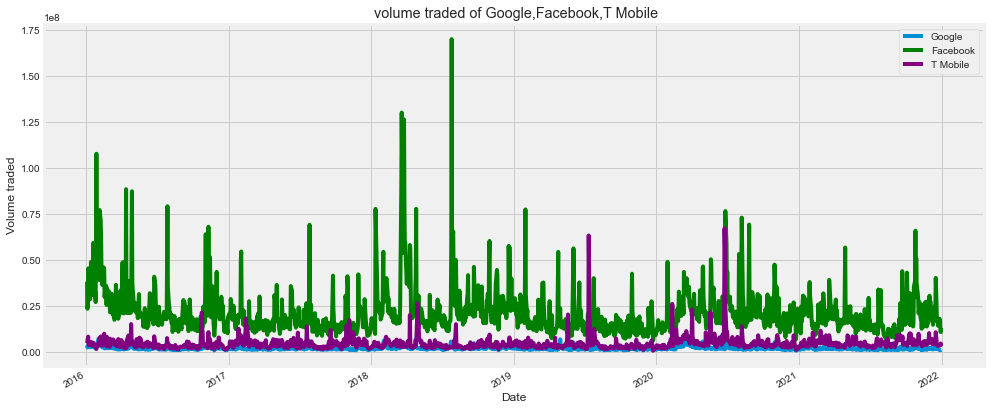

In [735]:
#  plotting the total volume of stock being traded each day in one graph : 

google['Volume'].plot(label='Google',figsize=(15,7))

facebook['Volume'].plot(label='Facebook',color='green')

Tmobile['Volume'].plot(label='T Mobile',color='purple')

plt.ylabel('Volume traded')
plt.title(' volume traded of Google,Facebook,T Mobile')
plt.legend()

In [736]:
#the exact position of the high pic noticed in the last graph:

facebook['Volume'].argmax()

645

In [737]:
facebook.iloc[[facebook['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,total traded
Date,,,,,,,
2018-07-26,180.130005,173.75,174.889999,176.259995,169803700,176.259995,2.969697e+10


Text(0.5, 1.0, ' stock prices of Facebook in july 26')

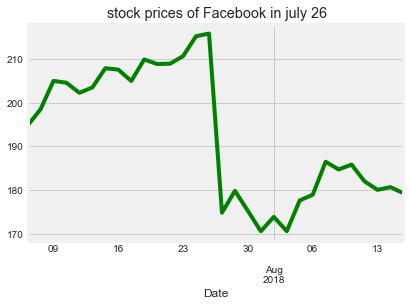

In [738]:
facebook.iloc[630:660]['Open'].plot(color='green')
plt.title(' stock prices of Facebook in july 26')

What happened
Shares of Facebook (NASDAQ:FB) fell 11.2% in July, according to data from S&P Global Market Intelligence, after the social-media titan's second-quarter results left investors concerned over decelerating growth and rising costs.

facebook's scandle:
News Feed changes


https://www.cnbc.com/2018/11/20/facebooks-scandals-in-2018-effect-on-stock.html


we've noticed again another pic for facebook stock so we're going to verify the exacte date 

# daily percentage change / daily return : it's the percentage of loss or gain 
                                Rt = (Pt/Pt-1)-1

In [739]:
# We'll use pct_change to find the percent change for each day:

for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

In [740]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,total traded,Daily Return
Date,,,,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100,759.440002,2.567928e+09,NaN
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800,761.530029,1.727477e+09,0.002752
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300,759.330017,1.808617e+09,-0.002889
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600,741.000000,2.356370e+09,-0.024140
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300,730.909973,1.776249e+09,-0.013617


# plot the daily return of each stock to see its volatility  :

Text(0.5, 1.0, ' Volatility of Google stock')

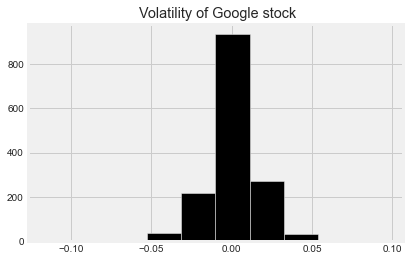

In [741]:
# plot the daily return of Google to see the volatility of the stock:

google ['Daily Return'].hist(bins=10,color='black')

plt.title(' Volatility of Google stock')


Text(0.5, 1.0, ' Volatility of Facebook stock')

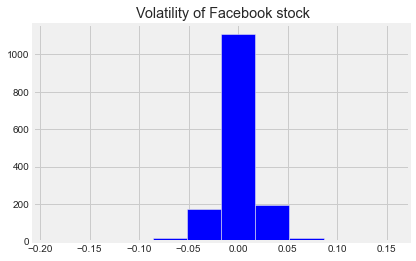

In [742]:
# plot the daily return of Facebook to see the volatility of the stock:

facebook['Daily Return'].hist(bins=10,color='blue')

plt.title(' Volatility of Facebook stock')


Text(0.5, 1.0, ' Volatility of TMobile stock')

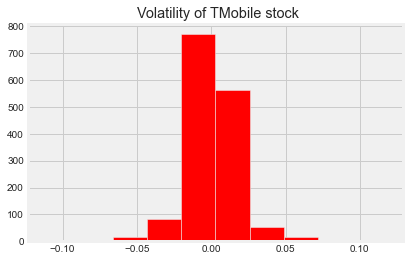

In [743]:
# plot the daily return of TMobile to see the volatility of the stock:

Tmobile ['Daily Return'].hist(bins=10,color='red')
plt.title(' Volatility of TMobile stock')


Text(0.5, 1.0, ' Volatility of Google, Facebook , T Mobile')

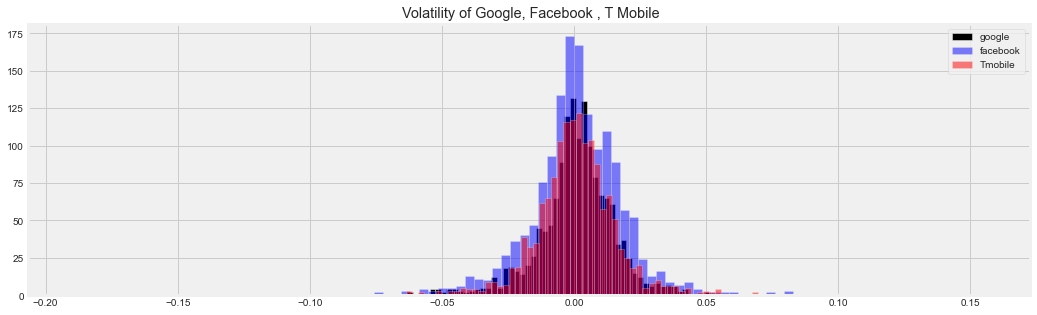

In [744]:
# plot the daily return of all the stocks :

google ['Daily Return'].hist(bins=100,label='google', alpha=1,color='black',figsize=(16,5))

facebook ['Daily Return'].hist(bins=100,label='facebook',alpha=0.5,color='blue',figsize=(16,5))

Tmobile ['Daily Return'].hist(bins=100,label='Tmobile',alpha=0.5,color='red',figsize=(16,5))


plt.legend()
plt.title(' Volatility of Google, Facebook , T Mobile')

Text(0.5, 1.0, ' Volatility of Google, Facebook , T Mobile using the kernel density estimate')

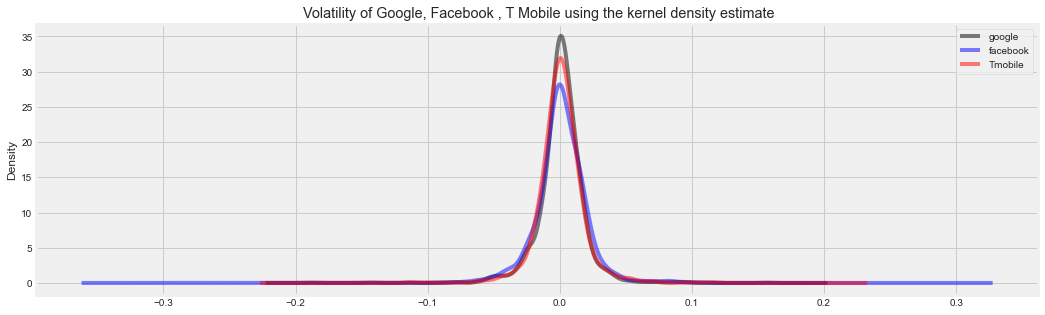

In [745]:
#using the kernel density estimate to normalize the data:

google ['Daily Return'].plot(kind='kde',label='google', alpha=0.5,color='black',figsize=(16,5))
facebook ['Daily Return'].plot(kind='kde',label='facebook',alpha=0.5,color='blue',figsize=(16,5))
Tmobile ['Daily Return'].plot(kind='kde',label='Tmobile',alpha=0.5,color='red',figsize=(16,5))

plt.legend()
plt.title(' Volatility of Google, Facebook , T Mobile using the kernel density estimate')


# boxplot =

In [746]:
# the daily return of the sector: 
box_df=pd.concat([google['Daily Return'],facebook['Daily Return'],Tmobile['Daily Return']],axis=1)
box_df.columns=['google returns','facebook returns','Tmobile returns']


Text(0.5, 1.0, ' box plot  of Google, Facebook , T Mobile ')

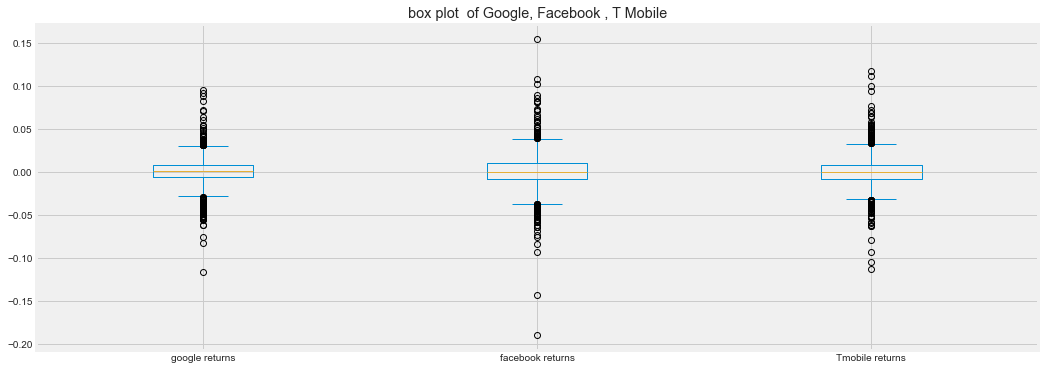

In [747]:
box_df.plot(kind='box',figsize=(16,6))      

plt.title(' box plot  of Google, Facebook , T Mobile ')


# correlations=

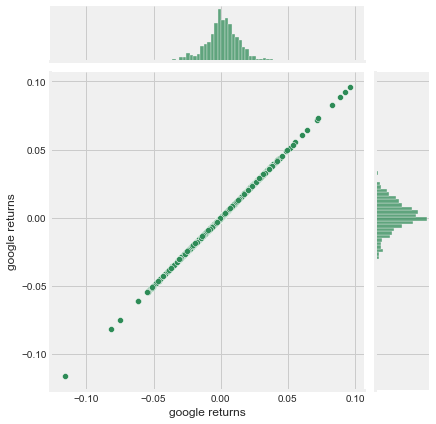

In [748]:
# Comparing Google to itself should show a perfectly linear relationship:
sns.jointplot('google returns', 'google returns', box_df, kind='scatter', color='seagreen')

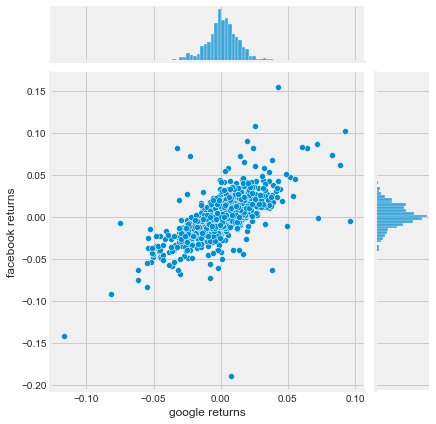

In [749]:
# We'll use joinplot to compare the daily returns of Google and facebook :
sns.jointplot('google returns', 'facebook returns', box_df, kind='scatter')

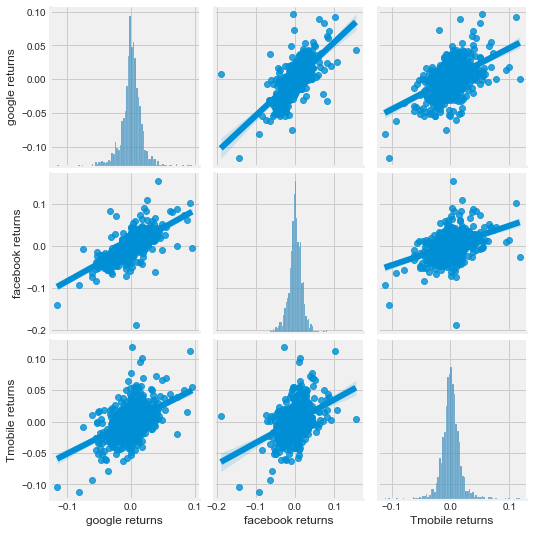

In [750]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis :

sns.pairplot(box_df, kind='reg')

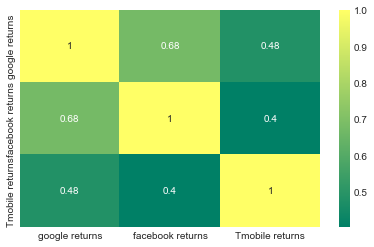

In [751]:
#  use sebron for a quick correlation plot for the daily returns:
sns.heatmap(box_df.corr(), annot=True, cmap='summer')

# cumulitive return = helps keep track of stock changes 
                             It=(1+Rt)*It-1= (Pt/Pt-1)*It-1
     

In [752]:
# we can use the cumulative product (cumprod):
google ['cumulative return']    = (1+google['Daily Return']).cumprod()

facebook ['cumulative return']  = (1+facebook['Daily Return']).cumprod()

Tmobile['cumulative return']    = (1+Tmobile['Daily Return']).cumprod()

In [753]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,total traded,Daily Return,cumulative return
Date,,,,,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100,759.440002,2.567928e+09,NaN,NaN
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800,761.530029,1.727477e+09,0.002752,1.002752
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300,759.330017,1.808617e+09,-0.002889,0.999855
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600,741.000000,2.356370e+09,-0.024140,0.975719
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300,730.909973,1.776249e+09,-0.013617,0.962433


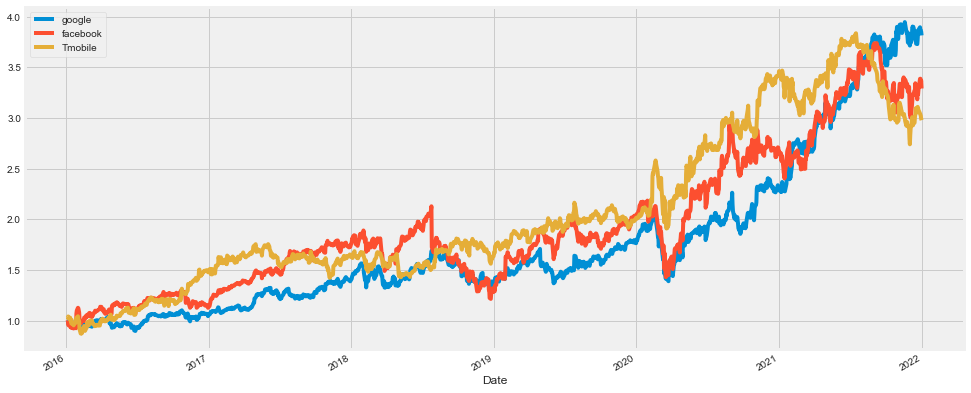

In [754]:
google['cumulative return'].plot(label='google',figsize=(15,7))
facebook['cumulative return'].plot(label='facebook')
Tmobile['cumulative return'].plot(label='Tmobile')

plt.legend()

# plotting the companies compared by the risk and the expected return =

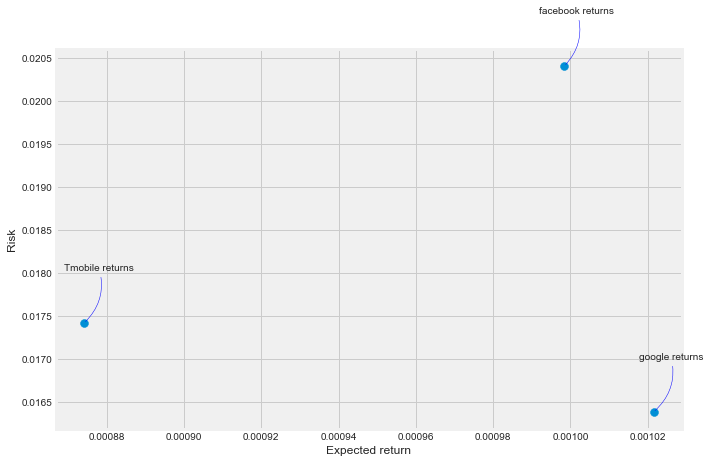

In [755]:

rets = box_df.dropna()


area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

The previous analysis made us have an idea about the communication sector and we have noticed that the correlation between google and facebook is high so we should eliminate one of them when constracting the portfolio, as we can see the google and facebook's expected return is nearly the same  but facebook has the highest risk so we decided to remove it from the  potfolio and use other stocks .
I made my research and I decided to make a portfolio composed with 4 stocks = ( Google ,TMobile,Tesla and Apple)

# PORTFOLIO ANALYSIS

In [756]:
# extracting the tesla's data:
tesla= web.DataReader("TSLA",'yahoo',start,end)
tesla.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [757]:
tesla.isna().any().sum()

0

In [758]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [759]:
#extracting the apple's data :
apple= web.DataReader("AAPL",'yahoo',start,end)
apple.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [760]:
apple.isna().any().sum()


0

In [761]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185038
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117552
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141882
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258961


In [762]:
tesla.to_csv('tesla_stock.csv')
apple.to_csv('apple_stock.csv')

# the portfolio that we're going to work with in the analysis =

In [763]:
stocks = pd.concat([Tmobile['Close'],google['Close'],tesla['Close'],apple['Close']],axis=1)

stocks.columns=['Tmobile','google','tesla','apple']

stocks.head()

,Tmobile,google,tesla,apple
Date,,,,
2016-01-04,38.950001,759.440002,44.681999,26.337500
2016-01-05,40.220001,761.530029,44.686001,25.677500
2016-01-06,40.049999,759.330017,43.807999,25.174999
2016-01-07,40.509998,741.000000,43.130001,24.112499
2016-01-08,39.880001,730.909973,42.200001,24.240000


In [764]:
#calcilate the returns of the portfolio:

returns = stocks/(stocks.shift(1))
returns

,Tmobile,google,tesla,apple
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,1.032606,1.002752,1.000090,0.974941
2016-01-06,0.995773,0.997111,0.980352,0.980430
2016-01-07,1.011486,0.975860,0.984523,0.957795
2016-01-08,0.984448,0.986383,0.978437,1.005288
...,...,...,...,...
2021-12-27,0.988908,1.006738,1.025248,1.022975
2021-12-28,0.996458,0.991755,0.995000,0.994233
2021-12-29,0.995599,0.999782,0.997905,1.000502


In [765]:
#using the log function to promote fairness :
logReturns = np.log(returns)
logReturns

,Tmobile,google,tesla,apple
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.032086,0.002748,0.000090,-0.025379
2016-01-06,-0.004236,-0.002893,-0.019844,-0.019764
2016-01-07,0.011420,-0.024436,-0.015598,-0.043121
2016-01-08,-0.015674,-0.013710,-0.021799,0.005274
...,...,...,...,...
2021-12-27,-0.011154,0.006716,0.024935,0.022715
2021-12-28,-0.003548,-0.008279,-0.005013,-0.005784
2021-12-29,-0.004411,-0.000218,-0.002097,0.000502


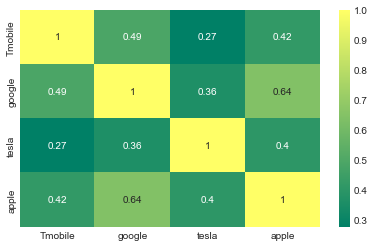

In [766]:
# correlations between stocks in the portfolio :
sns.heatmap(logReturns.corr(), annot=True, cmap='summer')

# efficient frontier =

In [767]:
nbreOFportfolio=10000


weight             = np.zeros((nbreOFportfolio,4))
expectedReturn     = np.zeros(nbreOFportfolio)
expectedVolatility = np.zeros(nbreOFportfolio)
sharpeRatio        = np.zeros(nbreOFportfolio)

meanLogRet = logReturns.mean()
sigma      = logReturns.cov()


for k in range (nbreOFportfolio):
    
    # generate random weight vector 
    w=np.array(np.random.random(4))
    w=w/np.sum(w)
    weight[k,:]= w
    
    #expected log return 
    expectedReturn[k]=np.sum(meanLogRet*w)
    
    #expected volatility
    expectedVolatility[k] = np.sqrt (np.dot(w.T,np.dot(sigma,w) ))
    
    #sharpe ratio
    sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]

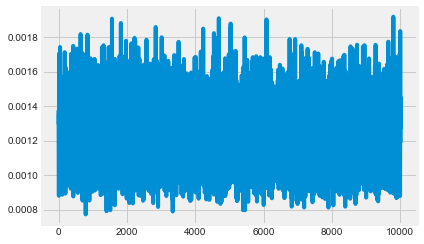

In [768]:
plt.plot(expectedReturn)

In [769]:
maxIndex=sharpeRatio.argmax()

weight[maxIndex,:]

array([0.12060681, 0.08056529, 0.22111152, 0.57771637])

In [770]:
# tmobile 12% google 9% tesla 22% apple 54%

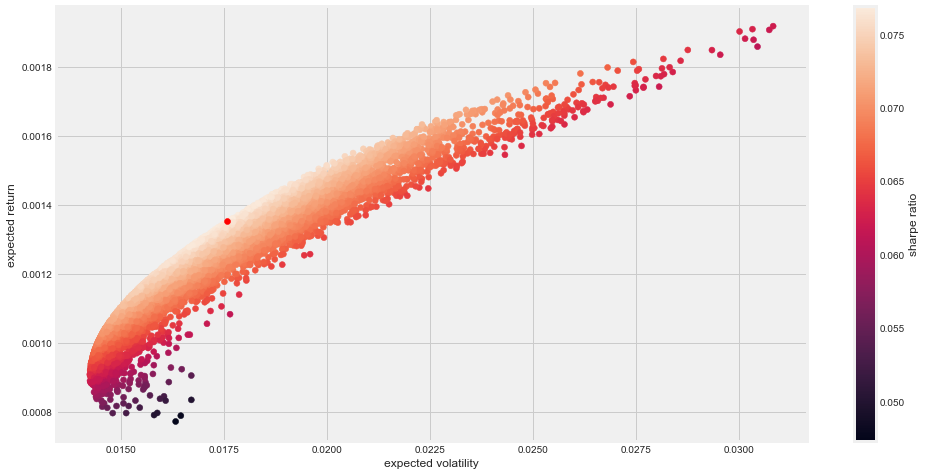

In [771]:
plt.figure(figsize=(15,8))

plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')

In [772]:
from scipy.optimize import minimize

def negativeSR (w):
    w=np.array(w)
    r=np.sum(meanLogRet*w)
    v=np.sqrt (np.dot(w.T,np.dot(sigma,w) ))
    SR=r/v
    return -SR

def checksumTOone(w):
    return np.sum(w)-1

w0=[0.25,0.25,0.25,0.25]
bounds=((0,1),(0,1),(0,1),(0,1))
constraints=({'type':'eq','fun':checksumTOone})

w_opt=minimize(negativeSR,w0,method='SLSQP',bounds=bounds,constraints=constraints)
w_opt

     fun: -0.0769135670928073
     jac: array([-3.29138711e-05, -7.78250396e-05, -7.29169697e-05,  5.04124910e-05])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.12133554, 0.10476054, 0.21785666, 0.55604725])

In [926]:
returns = np.linspace(0.0008,0.0018,50)
volatility_opt= []
def minimizeMYvolatility(w):
    w=np.array(w)
    v=np.sqrt (np.dot(w.T,np.dot(sigma,w) ))
    return v 

def getReturn (w):
        w = np.array(w)
        r = np.sum(meanLogRet*w)
        return r
for r in returns :
    
    #find best volatility 
    constraints = ({'type':'eq','fun':checksumTOone},
               {'type':'eq','fun':lambda w: getReturn(w)-r})
    opt = minimize(minimizeMYvolatility,w0,method='SLSQP',bounds=bounds,constraints=constraints)
    
     #save optimal volatility 
    volatility_opt.append(opt['fun'])


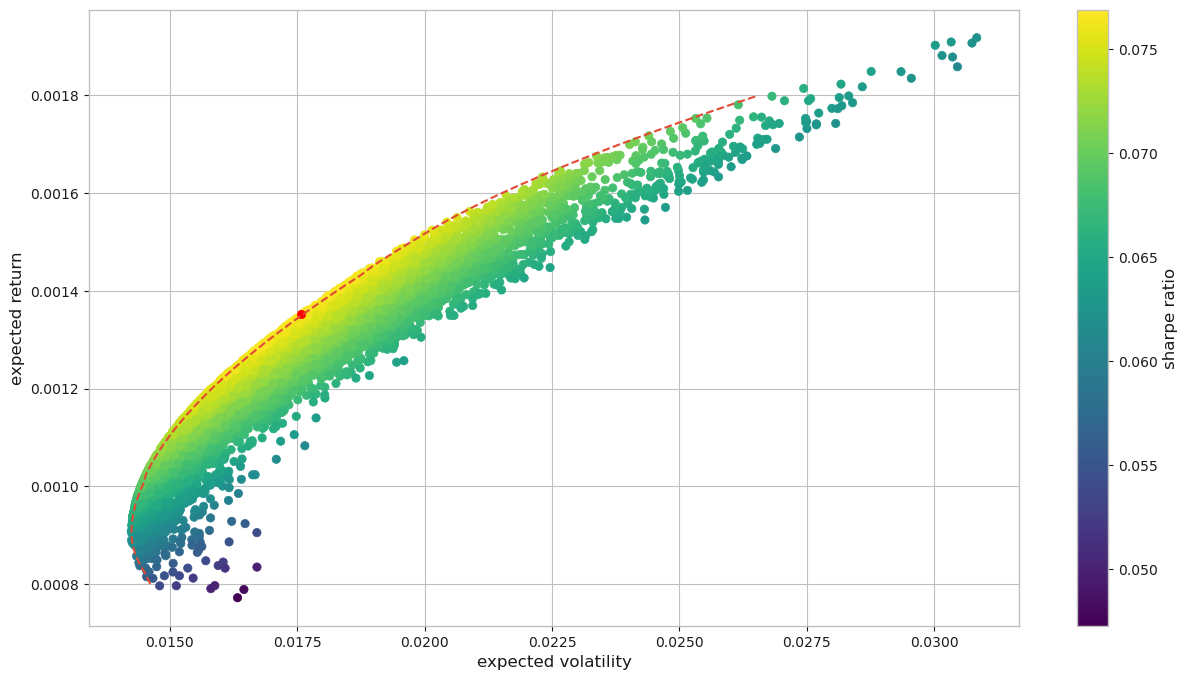

In [927]:
plt.figure(figsize=(15,8))

plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.plot(volatility_opt,returns,'--')

plt.show()

# portfolio value at risk (VAR) =


In [775]:
from scipy.stats import norm
def port_var(start_date,end_date,stocks,exposure,CI,days):
    
    stock = pd.DataFrame()
    stock = web.DataReader(stocks,start=start_date,end=end_date,data_source='yahoo')['Close']
    
    stock_return = stock.pct_change()
    stock_vol = stock_return.std()
    CL  = norm.ppf(CI/100)
    
    #portfolio variance /covariance matrix
    stock_cov = np.array(stock_return.cov())
    
    #stock weightage
    weights= np.array(exposure)/sum(exposure)
    weight_mat=np.mat(weights)
                  
    #portfolio variance
 
    port_var= (weight_mat*stock_cov)*weight_mat.T

    #portfolio_value at risk
    port_var=np.sqrt(port_var)*CL*np.sqrt(days)
    print ("the total exposure ( marketcap)is USD",sum(exposure))
    print ("{} day portfolio var at {}% confidence interval".format(days,CI),"is",port_var[0,0]*100)
    print ("{} day portfolio var at {}% confidence interval".format(days,CI),"is USD",port_var[0,0]*sum(exposure))

In [776]:
port_var('1-1-2016','1-1-2022',['FB','GOOGL','TSLA','AAPL'],[489.16,2833.12,238.82,6438.83],99,1)

the total exposure ( marketcap)is USD 9999.93
1 day portfolio var at 99% confidence interval is 3.8072136478345446
1 day portfolio var at 99% confidence interval is USD 380.71869973390096


as we were doing the analysis as was intrested with the apple stock because it has a 54% weight according to the efficient frontier

# APPLE ANALYSIS

In [777]:
import requests
import os
import json
from dotenv import load_dotenv
import datetime as datetime
from datetime import datetime

In [778]:
load_dotenv()

True

In [779]:
url = f'https://financialmodelingprep.com/api/v3/profile/AAPL?apikey=397272d40a9f2d74932e6c580e89202f'
overview = requests.get(url).json()

overview = pd.DataFrame(overview).from_dict(overview)
overview=overview.T # transpose the data

overview.columns= overview.iloc[0] # transform the colomn to data 
overview = overview.iloc[1:]# remove the first row


print(overview.info()) # to see the type of info if its an object it means its not a number
overview  


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, price to isFund
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAPL    35 non-null     object
dtypes: object(1)
memory usage: 560.0+ bytes
None


symbol,AAPL
price,137.59
beta,1.194642
volAvg,98319826
mktCap,2226921668608
lastDiv,0.89
range,123.13-182.94
changes,0.23999
companyName,Apple Inc.
currency,USD
cik,0000320193


# CAPM= MEDAF 

In [780]:
import statsmodels.api as sm
import seaborn
seaborn.set()

In [781]:
apple['daily_ret'] = apple['Close'].pct_change().dropna()
apple

,High,Low,Open,Close,Volume,Adj Close,daily_ret
Date,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185038,NaN
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979,-0.025059
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117552,-0.019570
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141882,-0.042205
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258961,0.005288
...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319,0.022975
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799149,-0.005767
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916,0.000502


In [782]:
sp500= web.DataReader("^GSPC",'yahoo',start,end)

In [783]:
print(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2016-01-04 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1511 non-null   float64
 1   Low        1511 non-null   float64
 2   Open       1511 non-null   float64
 3   Close      1511 non-null   float64
 4   Volume     1511 non-null   int64  
 5   Adj Close  1511 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 82.6 KB
None


In [784]:
sp500['daily_ret'] = sp500['Close'].pct_change().dropna()
sp500

,High,Low,Open,Close,Volume,Adj Close,daily_ret
Date,,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034,NaN
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961,0.002012
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010,-0.013115
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966,-0.023700
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029,-0.010838
...,...,...,...,...,...,...,...
2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,0.013839
2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,-0.001010
2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,0.001402


In [785]:
capm = pd.concat([apple['daily_ret'],sp500['daily_ret']],axis=1)
capm.columns=['apple','sp500']
capm

,apple,sp500
Date,,
2016-01-04,NaN,NaN
2016-01-05,-0.025059,0.002012
2016-01-06,-0.019570,-0.013115
2016-01-07,-0.042205,-0.023700
2016-01-08,0.005288,-0.010838
...,...,...
2021-12-27,0.022975,0.013839
2021-12-28,-0.005767,-0.001010
2021-12-29,0.000502,0.001402


In [786]:
capm = capm.iloc[1:]
capm

,apple,sp500
Date,,
2016-01-05,-0.025059,0.002012
2016-01-06,-0.019570,-0.013115
2016-01-07,-0.042205,-0.023700
2016-01-08,0.005288,-0.010838
2016-01-11,0.016192,0.000853
...,...,...
2021-12-27,0.022975,0.013839
2021-12-28,-0.005767,-0.001010
2021-12-29,0.000502,0.001402


In [787]:
capm.isna().any()


apple    False
sp500    False
dtype: bool

In [788]:
print(capm.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-01-05 to 2021-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   apple   1510 non-null   float64
 1   sp500   1510 non-null   float64
dtypes: float64(2)
memory usage: 35.4 KB
None


In [789]:
capm.describe()

,apple,sp500
count,1510.000000,1510.000000
mean,0.001436,0.000638
std,0.018524,0.011556
min,-0.128647,-0.119841
25%,-0.006486,-0.002962
50%,0.001101,0.000795
75%,0.010259,0.005367
max,0.119808,0.093828


In [790]:
y=capm['apple']
x1=capm['sp500']

In [791]:
x1.shape

(1510,)

In [792]:
y.shape

(1510,)

In [793]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  apple   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1853.
Date:                Mon, 23 May 2022   Prob (F-statistic):          1.06e-264
Time:                        10:45:45   Log-Likelihood:                 4485.9
No. Observations:                1510   AIC:                            -8968.
Df Residuals:                    1508   BIC:                            -8957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      2.115      0.035    4.92e-05       0.001
sp500          1.1902      0.028     43.043      0.000       1.136       1.244
==============================================================================
Omnibus:                      255.103   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2624.119
Skew:                           0.453   Prob(JB):                         0.00
Kurtosis:                       9.394   Cond. No.                         86.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

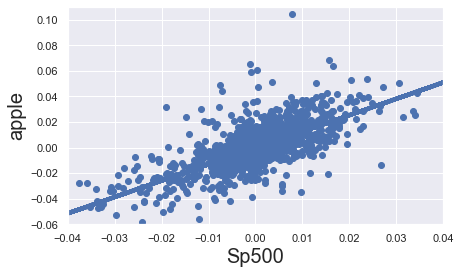

In [794]:
plt.scatter(x1,y)
y1hat=1.2809*x1-0.0003
plt.plot(x1,y1hat,lw=4,c='b',label='regression line')
plt.xlim([-0.04,0.04])
plt.ylim([-0.06,0.11])

plt.xlabel('Sp500',fontsize=20)
plt.ylabel('apple',fontsize=20)
plt.show()

# APPLE fundamental analysis=

annual Financial Ratios Stats:

In [795]:
url = f'https://financialmodelingprep.com/api/v3/ratios/AAPL?limit=40&apikey=046822b7734f2d9c614b76f5f7f5417e'
annual_ratios = requests.get(url).json()
annual_ratios = pd.DataFrame(annual_ratios)
annual_ratios['date'] = pd.to_datetime(annual_ratios['date'])
annual_ratios = annual_ratios.set_index('date')
annual_ratios

,symbol,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
date,,,,,,,,,,,,,,,,,,,,,
2021-09-25,AAPL,FY,1.074553,0.909660,0.278449,51.390969,11.276593,62.667561,93.851071,-31.183510,...,6.786117,26.219656,26.706799,23.861253,23.861253,0.367742,6.786117,0.005828,20.889553,39.348186
2020-09-26,AAPL,FY,1.363604,1.218195,0.360710,49.787534,8.741883,58.529418,91.048190,-32.518772,...,7.272322,34.773150,27.211359,24.746031,24.746031,3.277438,7.272322,0.007053,25.558891,30.553901
2019-09-28,AAPL,FY,1.540126,1.384447,0.462022,64.258765,9.263639,73.522404,104.314077,-30.791673,...,4.420394,20.813515,19.527159,16.573786,16.573786,-62.492578,4.420394,0.012277,14.772472,12.709658
2018-09-29,AAPL,FY,1.123843,0.986566,0.221733,67.332499,8.817631,76.150130,124.570214,-48.420084,...,3.959898,17.666917,16.402259,13.582267,13.582267,0.597709,3.959898,0.013038,13.099961,9.815760
2017-09-30,AAPL,FY,1.276063,1.089670,0.201252,56.800671,12.563631,69.364302,126.927606,-57.563304,...,3.794457,17.989671,17.121402,13.676823,13.676823,1.632758,3.794457,0.014680,12.605749,6.488908


In [796]:
annual_ratios.to_csv('annual_ratios.csv')

In [797]:
annual_ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
currentRatio,5.0,1.275638,0.187862,1.074553,1.123843,1.276063,1.363604,1.540126
quickRatio,5.0,1.117708,0.188756,0.909660,0.986566,1.089670,1.218195,1.384447
cashRatio,5.0,0.304833,0.107426,0.201252,0.221733,0.278449,0.360710,0.462022
daysOfSalesOutstanding,5.0,57.914088,7.726465,49.787534,51.390969,56.800671,64.258765,67.332499
daysOfInventoryOutstanding,5.0,10.132675,1.705649,8.741883,8.817631,9.263639,11.276593,12.563631
operatingCycle,5.0,68.046763,7.363742,58.529418,62.667561,69.364302,73.522404,76.150130
daysOfPayablesOutstanding,5.0,108.142232,16.836472,91.048190,93.851071,104.314077,124.570214,126.927606
cashConversionCycle,5.0,-40.095469,12.225122,-57.563304,-48.420084,-32.518772,-31.183510,-30.791673
grossProfitMargin,5.0,0.389288,0.016122,0.378178,0.382332,0.383437,0.384699,0.417794
operatingProfitMargin,5.0,0.263912,0.022401,0.241473,0.245720,0.266940,0.267604,0.297824


Operating Profit Margin=

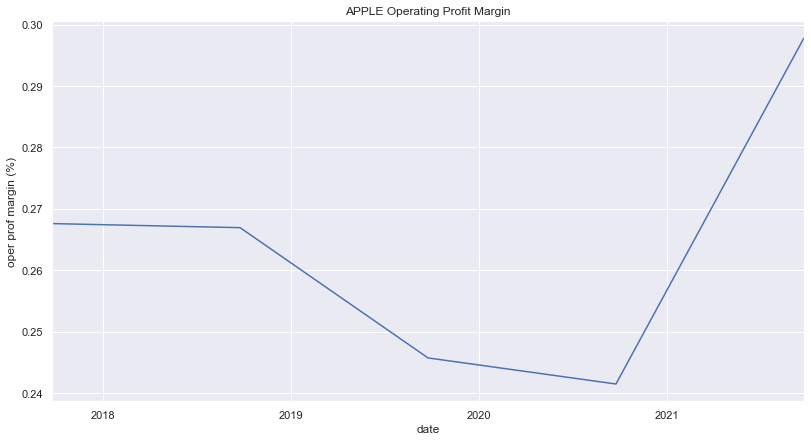

In [798]:
annual_ratios['operatingProfitMargin'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE Operating Profit Margin',ylabel='oper prof margin (%)')

ROIC =

In [799]:
url = f'https://financialmodelingprep.com/api/v3/key-metrics/AAPL?limit=40&apikey=046822b7734f2d9c614b76f5f7f5417e'
key_metrics = requests.get(url).json()
key_metrics = pd.DataFrame(key_metrics)
key_metrics['date'] = pd.to_datetime(key_metrics['date'])
key_metrics = key_metrics.set_index('date')
key_metrics.T

date,2021-09-25,2020-09-26,2019-09-28,2018-09-29,2017-09-30
symbol,AAPL,AAPL,AAPL,AAPL,AAPL
period,FY,FY,FY,FY,FY
revenuePerShare,21.903541,15.820258,14.085283,13.399334,10.984444
netIncomePerShare,5.669029,3.308587,2.991446,3.003354,2.316885
operatingCashFlowPerShare,6.229346,4.64923,3.756685,3.906565,3.047491
freeCashFlowPerShare,5.565624,4.228014,3.188508,3.23492,2.43438
cashPerShare,3.750553,5.241031,5.443948,3.344902,3.554608
bookValuePerShare,3.777557,3.765477,4.898834,5.405593,6.423269
tangibleBookValuePerShare,3.777557,3.765477,4.898834,5.405593,6.039206
shareholdersEquityPerShare,3.777557,3.765477,4.898834,5.405593,6.423269


In [800]:
key_metrics.to_csv('key_metrics.csv')

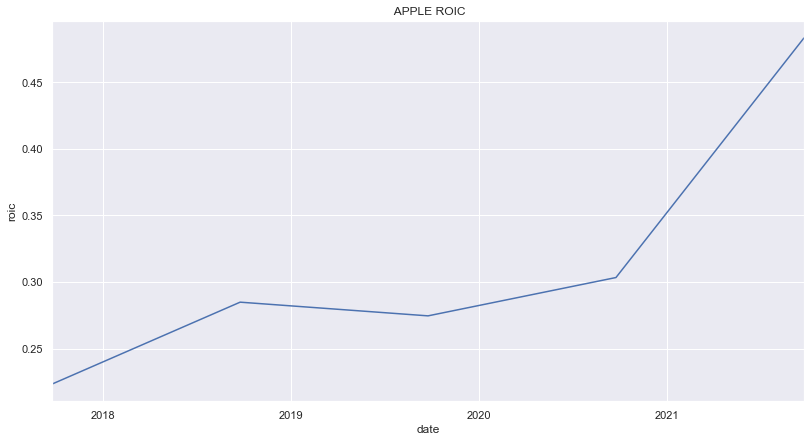

In [801]:
key_metrics['roic'].astype('float').plot(figsize= (12,7), grid=True,title=f' APPLE ROIC',ylabel='roic')

ROE =

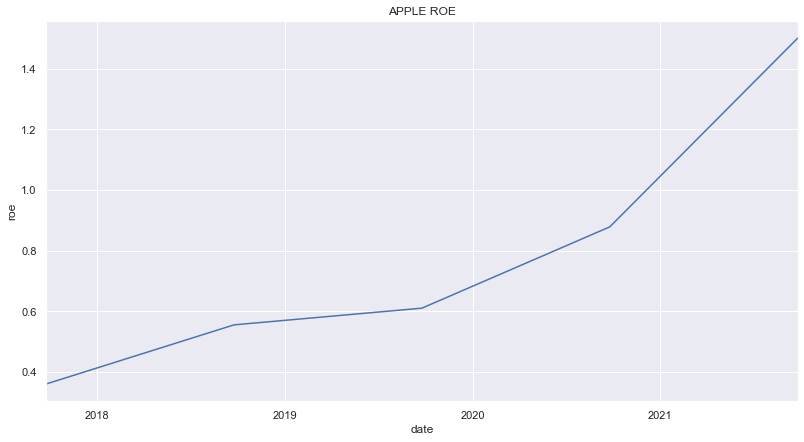

In [802]:
key_metrics['roe'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE ROE',ylabel='roe')

Current Ratio =

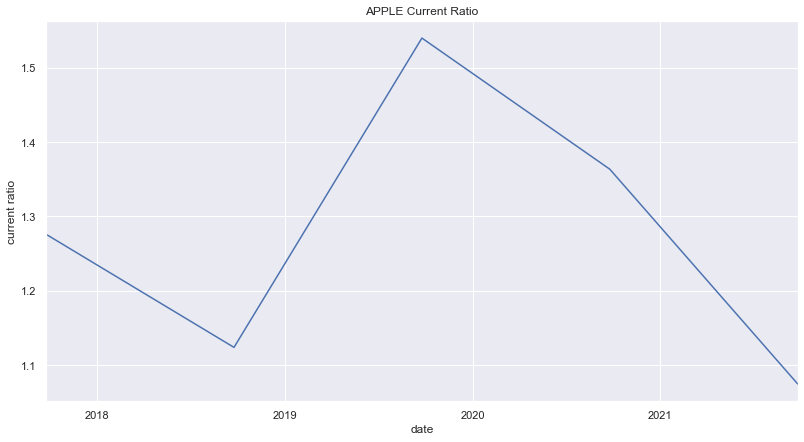

In [803]:
annual_ratios['currentRatio'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE Current Ratio',ylabel='current ratio')

D/E =

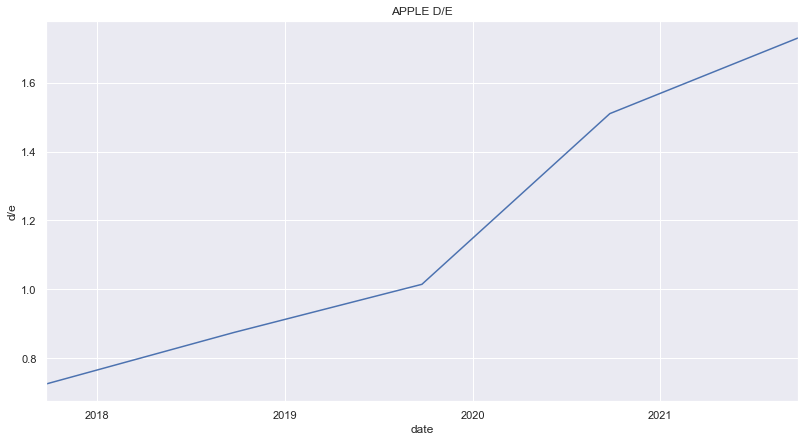

In [804]:
key_metrics['debtToEquity'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE D/E',ylabel='d/e')

P/B =

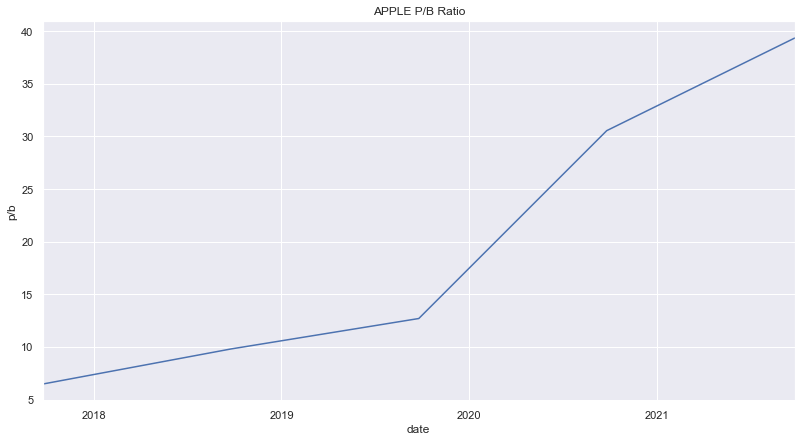

In [805]:
key_metrics['pbRatio'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE P/B Ratio',ylabel='p/b')

Book Value per Share

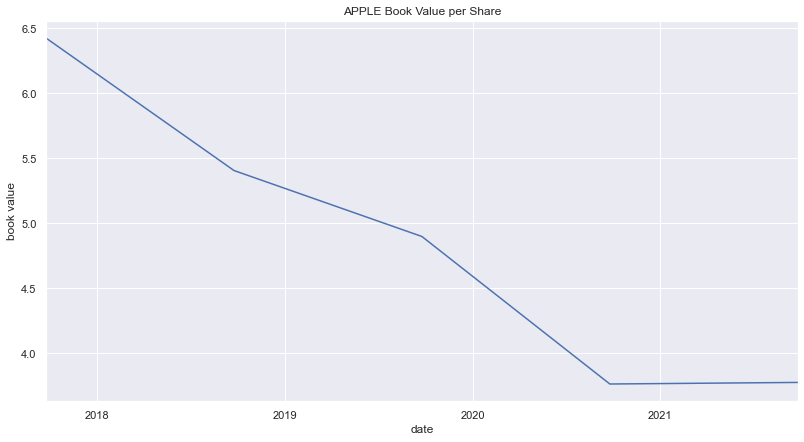

In [806]:
key_metrics['bookValuePerShare'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE Book Value per Share',ylabel='book value')

P/E =

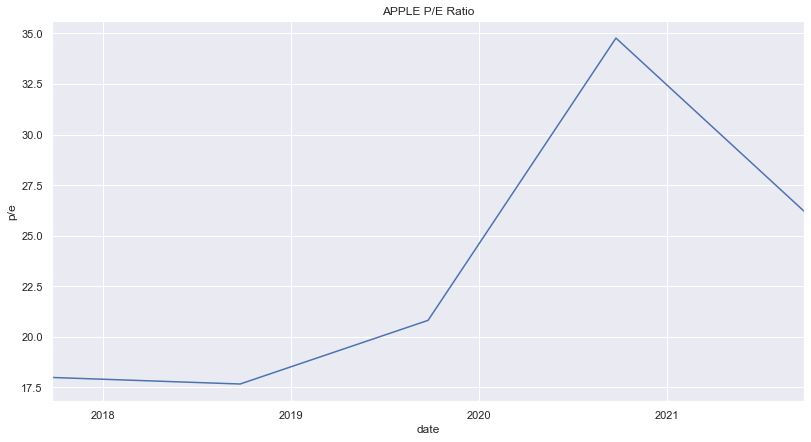

In [807]:
key_metrics['peRatio'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE P/E Ratio',ylabel='p/e')

Net Income per Share =

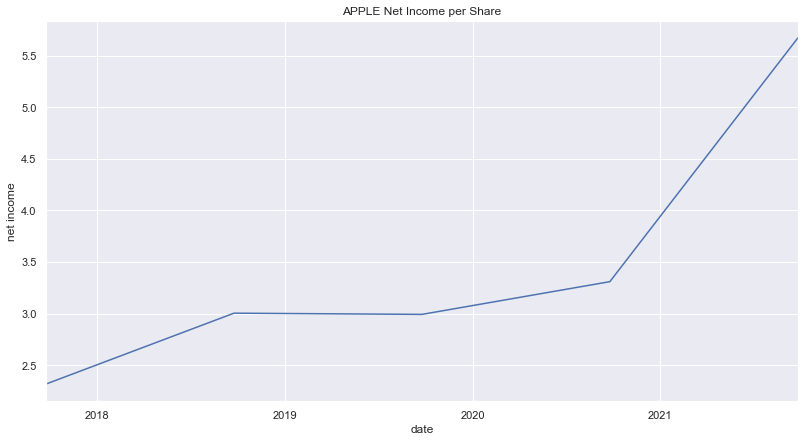

In [808]:
key_metrics['netIncomePerShare'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE Net Income per Share',ylabel='net income')

FCF per Share =

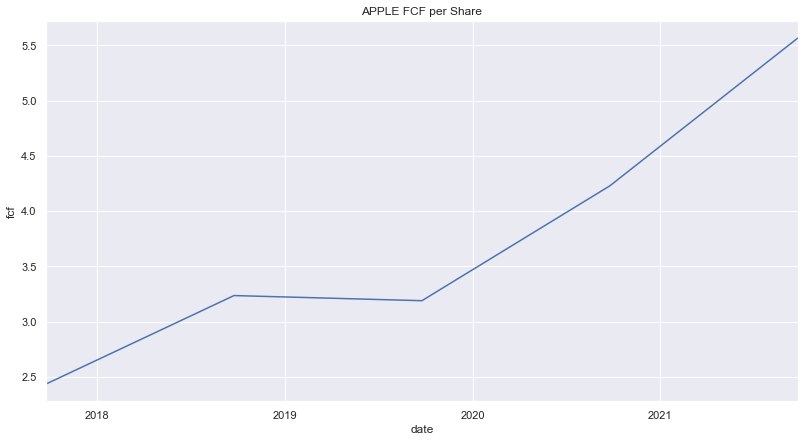

In [809]:
key_metrics['freeCashFlowPerShare'].astype('float').plot(figsize= (12,7), grid=True,title=f'APPLE FCF per Share',ylabel='fcf')

In [810]:
url = f'https://financialmodelingprep.com/api/v3/financial-growth/AAPL?limit=20&apikey=046822b7734f2d9c614b76f5f7f5417e'
growth = requests.get(url).json()

growth = pd.DataFrame(growth)

growth['date'] = pd.to_datetime(growth['date'])

growth = growth.set_index('date')
growth.T

date,2021-09-25,2020-09-26,2019-09-28,2018-09-29,2017-09-30
symbol,AAPL,AAPL,AAPL,AAPL,AAPL
period,FY,FY,FY,FY,FY
revenueGrowth,0.332594,0.055121,-0.020411,0.15862,0.063045
grossProfitGrowth,0.456191,0.066713,-0.033848,0.15482,0.046557
ebitgrowth,0.64357,0.036884,-0.098282,0.155745,0.021991
operatingIncomeGrowth,0.64357,0.036884,-0.098282,0.155745,0.021991
netIncomeGrowth,0.649161,0.039,-0.071811,0.231226,0.05831
epsgrowth,0.712991,0.106099,-0.003331,0.295577,0.11018
epsdilutedGrowth,0.710366,0.103448,-0.001679,0.29316,0.108303
weightedAverageSharesGrowth,-0.037508,-0.060592,-0.068117,-0.050192,-0.046351


In [811]:
growth.describe().T

,count,mean,std,min,25%,50%,75%,max
revenueGrowth,5.0,0.117794,0.135860,-0.020411,0.055121,0.063045,0.158620,0.332594
grossProfitGrowth,5.0,0.138087,0.190068,-0.033848,0.046557,0.066713,0.154820,0.456191
ebitgrowth,5.0,0.151982,0.289159,-0.098282,0.021991,0.036884,0.155745,0.643570
operatingIncomeGrowth,5.0,0.151982,0.289159,-0.098282,0.021991,0.036884,0.155745,0.643570
netIncomeGrowth,5.0,0.181177,0.283208,-0.071811,0.039000,0.058310,0.231226,0.649161
epsgrowth,5.0,0.244303,0.283156,-0.003331,0.106099,0.110180,0.295577,0.712991
epsdilutedGrowth,5.0,0.242720,0.282149,-0.001679,0.103448,0.108303,0.293160,0.710366
weightedAverageSharesGrowth,5.0,-0.052552,0.012013,-0.068117,-0.060592,-0.050192,-0.046351,-0.037508
weightedAverageSharesDilutedGrowth,5.0,-0.051717,0.012499,-0.070238,-0.057403,-0.047905,-0.045196,-0.037842
dividendsperShareGrowth,5.0,0.093332,0.028608,0.061635,0.067451,0.102027,0.104947,0.130598


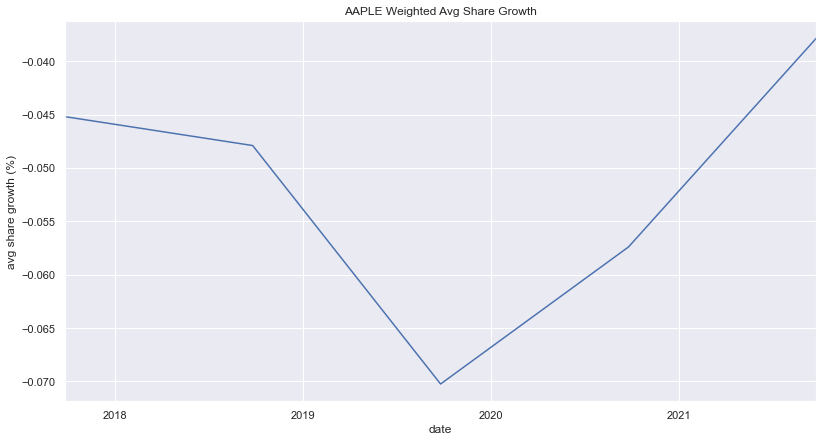

In [812]:
growth['weightedAverageSharesDilutedGrowth'].astype('float').plot(figsize= (12,7), grid=True,title=f'AAPLE Weighted Avg Share Growth',ylabel='avg share growth (%)')

# technical analysis of apple stock=

In [813]:
import yfinance as yf
import mplfinance as mpf

from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter , date2num , WeekdayLocator , DayLocator , MONDAY


Text(0.5, 1.0, ' candlestick chart of apple')

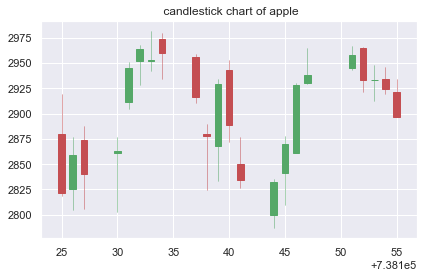

In [814]:

apple_reset=google.loc['2021-12':'2021-12'].reset_index()

apple_reset['date_ax'] = apple_reset ['Date'].apply(lambda date: date2num(date))

apple_values=[tuple(vals) for vals in apple_reset[['date_ax','Open','High','Low','Close']].values]

mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter=DateFormatter('%b%d')
dayFormatter=DateFormatter('%d')

fig, ax=plt.subplots()
candlestick_ohlc(ax, apple_values ,width=0.6,colorup='g',colordown='r')
plt.title(' candlestick chart of apple')



In [815]:
# create functtions to calculate the SMA(simple moving average) and EMA(exponentioal moving average)
# create the simple moving average 
def SMA(data,period=50,column='Close'):
    return data[column].rolling(window=period).mean()

#create the exponential moving average
def EMA(data,period=20,column='Close'):
    return data[column].ewm(span=period,adjust=False).mean()

Text(0.5, 1.0, ' MA  50, 20, 10  of apple')

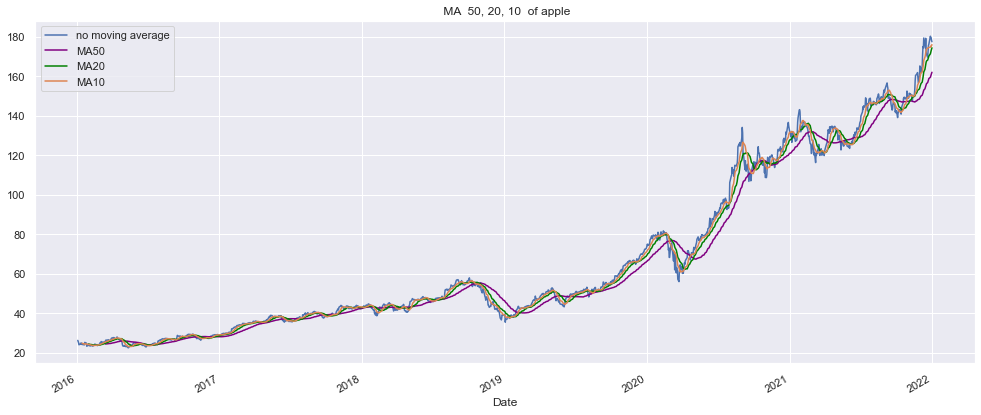

In [816]:
apple['Close'].plot(label='no moving average',figsize=(15,7))


apple['MA50']=apple['Close'].rolling(50).mean()
apple['MA50'].plot(label='MA50',color='purple')

apple['MA20']=apple['Close'].rolling(20).mean()
apple['MA20'].plot(label='MA20',color='green')

apple['MA10']=apple['Close'].rolling(10).mean()
apple['MA10'].plot(label='MA10')
plt.legend()
plt.title(' MA  50, 20, 10  of apple')

In [817]:
start1='2021-12-31'
apple1= web.DataReader("AAPL",'yahoo',start1)

In [818]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

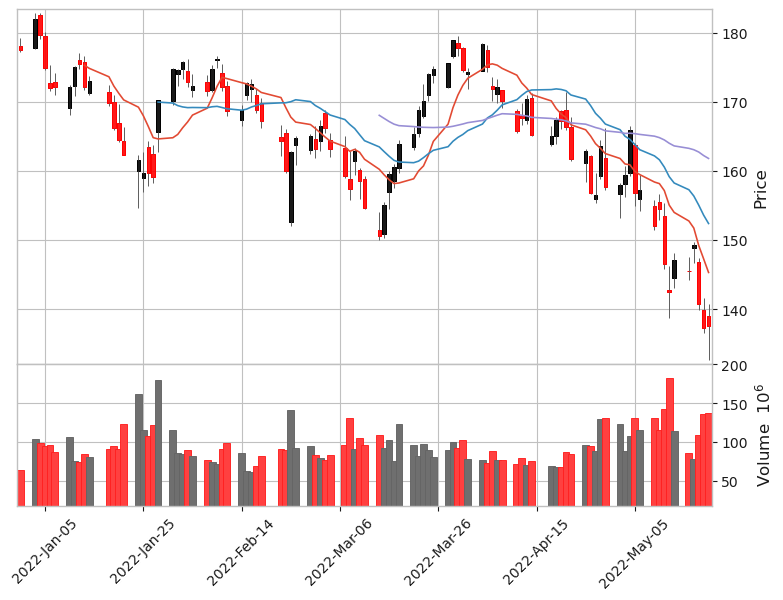

In [819]:
mpf.plot(apple1,type='candle',volume=True,mav=(10,20,50),tight_layout=True,style='checkers',show_nontrading=True)

In [820]:
# calculate the MACD(moving average convergence/divergence)
def MACD(data,period_long=26,period_short=12,period_signal=9,column='Close'):
    
    #calculate the short turm exponential moving average
    shortEMA= EMA (data,period_short,column=column)
    
    #calculate the long turm exponential moving average
    longEMA= EMA (data,period_long,column=column)
    
    # calculate the MACD 
    data['MACD']= shortEMA - longEMA
    # calcukate a signal ligne
    data['signal_line']= EMA(data,period_signal,column='MACD')
    return data




In [821]:
# create a function to compute the relative strength index (RSI)
def RSI(data,period=14,column='Close'):
    delta=data[column].diff(1) # diff to find the discrete function over the column axis 
    delta=delta[1:]
    up=delta.copy()
    down=delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain=SMA(data,period,column='up')
    AVG_loss=abs(SMA(data,period,column='down'))
    RS=AVG_Gain/AVG_loss
    RSI=100.0-(100.0/(1.0+RS))
    
    data ['RSI']=RSI
    return data

In [822]:
# show the data 
apple

,High,Low,Open,Close,Volume,Adj Close,daily_ret,MA50,MA20,MA10
Date,,,,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185038,NaN,NaN,NaN,NaN
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979,-0.025059,NaN,NaN,NaN
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117552,-0.019570,NaN,NaN,NaN
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141882,-0.042205,NaN,NaN,NaN
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258961,0.005288,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319,0.022975,159.597001,171.4630,174.776001
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799149,-0.005767,160.286001,172.4155,175.131000
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916,0.000502,160.942601,173.1195,175.636000


In [823]:
# create/add to  the dataset 
MACD(apple)
RSI(apple)
apple['SMA']=SMA(apple)
apple['EMA']=EMA(apple)



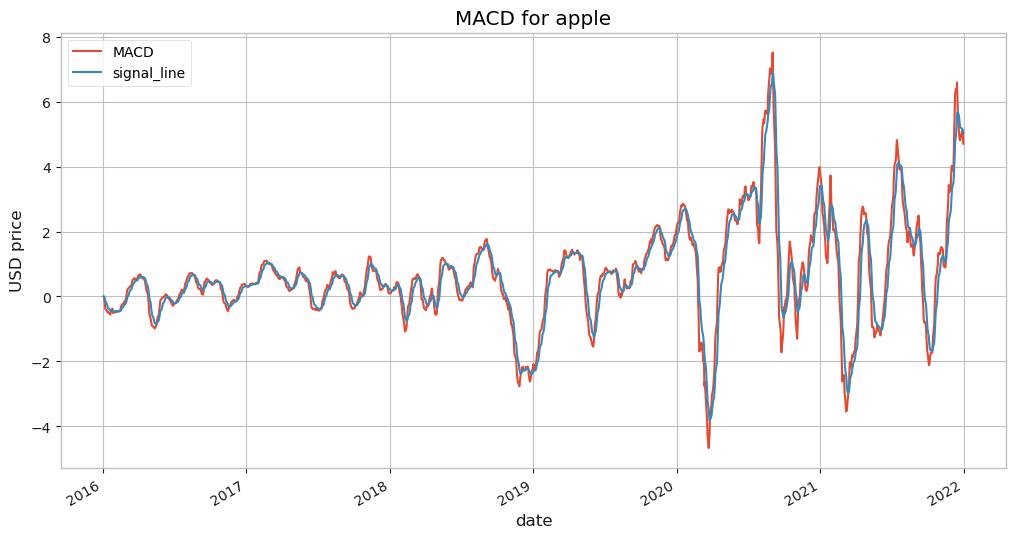

In [824]:
# plot the chart 
column_list=['MACD','signal_line']
apple[column_list].plot(figsize=(12.2,6.4))
plt.title('MACD for apple')
plt.ylabel('USD price')
plt.xlabel('date')
plt.show()

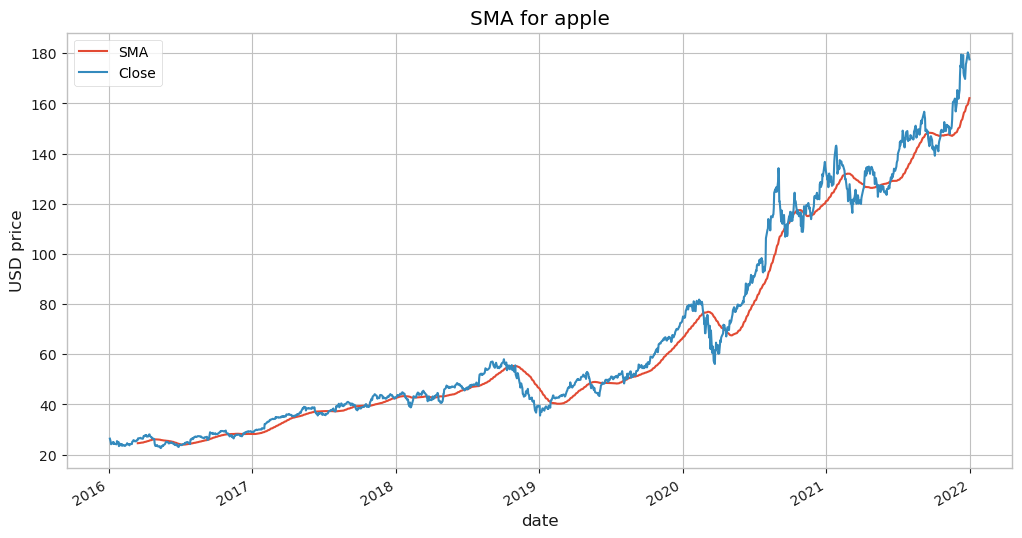

In [825]:
# plot the chart 
column_list=['SMA','Close']
apple[column_list].plot(figsize=(12.2,6.4))
plt.title('SMA for apple')
plt.ylabel('USD price')
plt.xlabel('date')
plt.show()

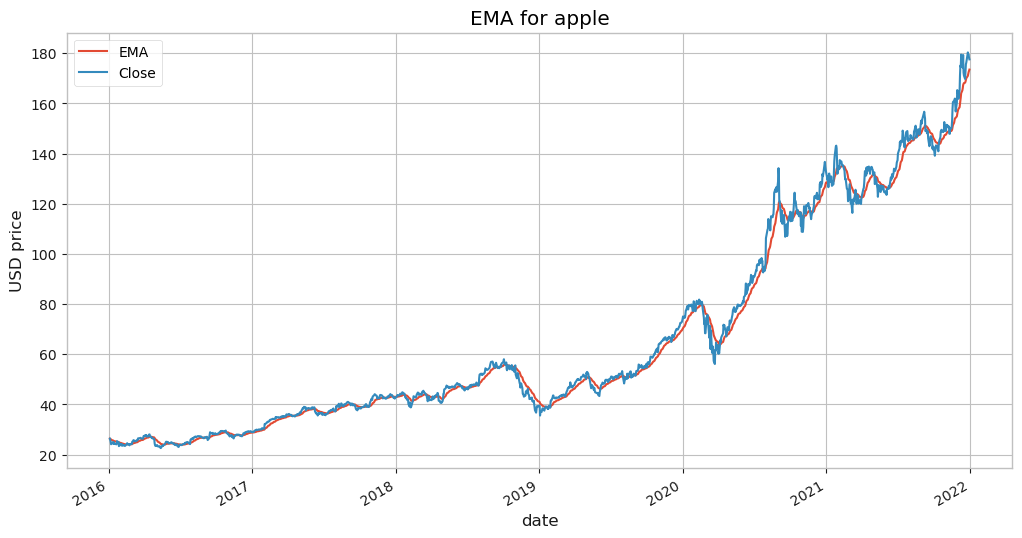

In [826]:
# plot the chart 
column_list=['EMA','Close']
apple[column_list].plot(figsize=(12.2,6.4))
plt.title('EMA for apple')
plt.ylabel('USD price')
plt.xlabel('date')
plt.show()

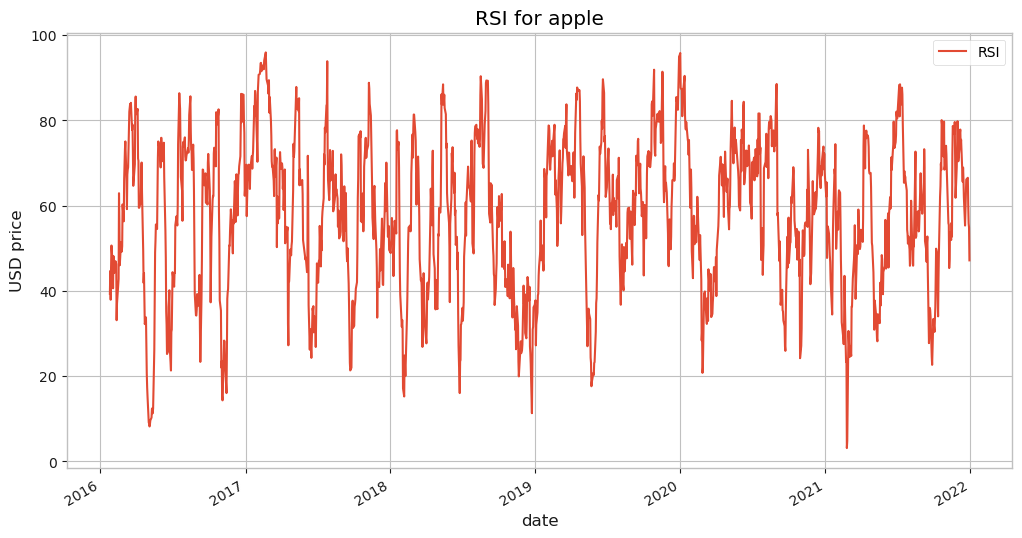

In [827]:
# plot the chart 
column_list=['RSI']
apple[column_list].plot(figsize=(12.2,6.4))
plt.title('RSI for apple')
plt.ylabel('USD price')
plt.xlabel('date')
plt.show()

# PREDECTION OF THE APPLE'S PRICES 

# LSTM 

In [828]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout,LSTM,GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [829]:
data = apple.filter(['Close'])

In [830]:
dataset= data.values

In [831]:
training_data_len = math.ceil( len(dataset) *0.8)

In [832]:
training_data_len

1209

In [833]:
scaler= MinMaxScaler(feature_range =(0,1))

In [834]:
scaled_data= scaler.fit_transform( dataset)

In [835]:
scaled_data

array([[0.0237884 ],
       [0.01960443],
       [0.0164189 ],
       ...,
       [0.99397764],
       [0.98649716],
       [0.98250344]])

In [836]:
train_data=scaled_data[0:training_data_len , :]

In [837]:
x_train=[]
y_train=[]

In [838]:
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61 :
        print (x_train)
        print (y_train)
        print()

[array([0.0237884 , 0.01960443, 0.0164189 , 0.00968335, 0.01049162,
       0.01297981, 0.01524613, 0.0111731 , 0.0145488 , 0.01076104,
       0.01001618, 0.0102222 , 0.00944563, 0.01755999, 0.01442202,
       0.01529367, 0.0048813 , 0.00594314, 0.01109385, 0.00965166,
       0.00656123, 0.00952487, 0.00992108, 0.0058322 , 0.00740119,
       0.00736949, 0.00622841, 0.00532505, 0.00578465, 0.00998447,
       0.01233004, 0.00938224, 0.00903357, 0.01036483, 0.00689405,
       0.00912866, 0.01017466, 0.01041239, 0.01006372, 0.01614949,
       0.01649815, 0.01768678, 0.02007988, 0.01827317, 0.0169419 ,
       0.01708455, 0.01716378, 0.01889126, 0.01930331, 0.02256808,
       0.024771  , 0.02450158, 0.02469175, 0.02467591, 0.02595963,
       0.02502457, 0.02429554, 0.02353483, 0.02748107, 0.03046055])]
[0.029557198645208754]

[array([0.0237884 , 0.01960443, 0.0164189 , 0.00968335, 0.01049162,
       0.01297981, 0.01524613, 0.0111731 , 0.0145488 , 0.01076104,
       0.01001618, 0.0102222 , 0.0

In [839]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [840]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
x_train.shape

(1149, 60, 1)

In [841]:
model = Sequential ()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

In [842]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [843]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1149/1149 [==============================] - 35s 25ms/step - loss: 7.8968e-04


In [844]:
test_data = scaled_data[training_data_len - 60: , :]

In [845]:

x_test= []
y_test =dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [846]:
x_test =np.array(x_test)

In [847]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1] , 1 ))

In [848]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 13ms/step


In [849]:
rmse = np.sqrt ( np.mean ( predictions - y_test)**2)
print('root mean square error ',rmse)

root mean square error  0.4736922308309189


C:\Users\IMINFO\AppData\Local\Temp\ipykernel_17364\2501075112.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



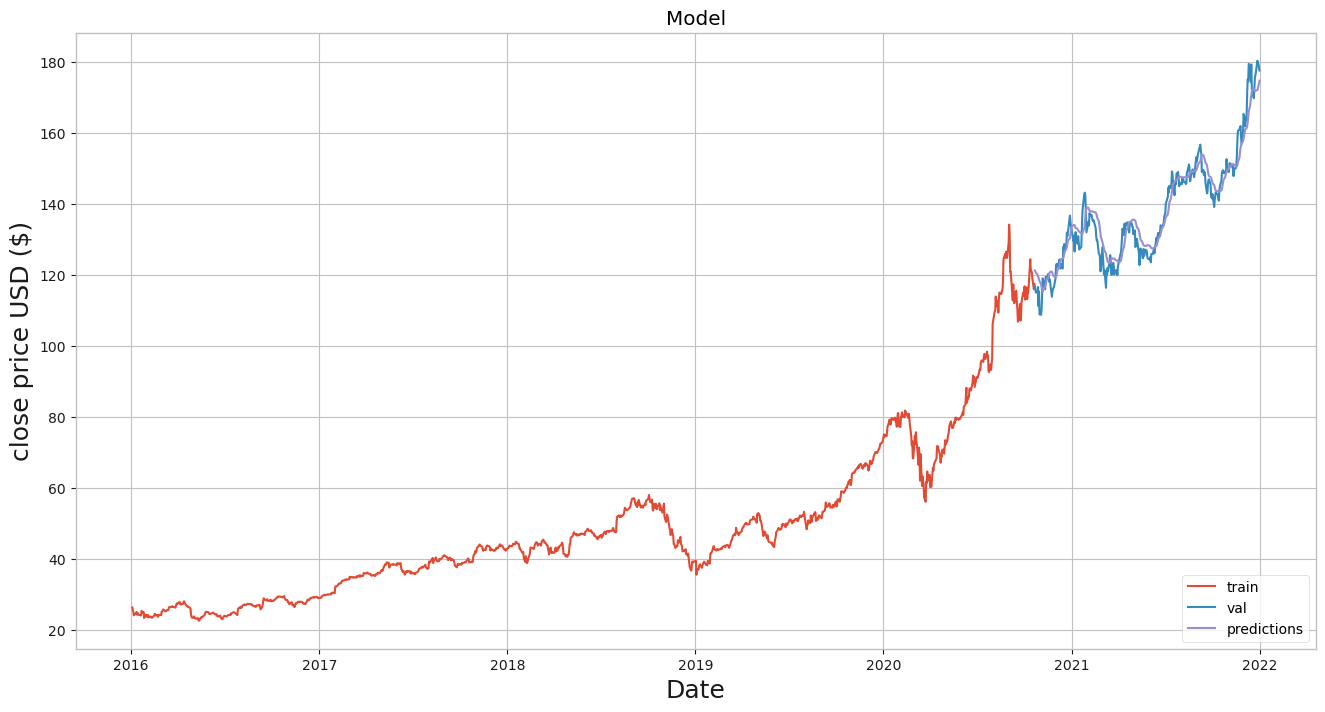

In [850]:
train= data[:training_data_len]
valid= data[training_data_len:]
valid ['predictions']=predictions


plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'], loc='lower right')
plt.show()


In [851]:
# Show the valid and predicted prices
valid

,Close,predictions
Date,,
2020-10-21,116.870003,121.227295
2020-10-22,115.750000,120.987724
2020-10-23,115.040001,120.609161
2020-10-26,115.050003,120.128426
2020-10-27,116.599998,119.633804
...,...,...
2021-12-27,180.330002,172.084015
2021-12-28,179.289993,172.732834
2021-12-29,179.380005,173.452545


In [852]:
# get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2016-01-01', end='2022-05-20')
# create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to array
last_60_days= new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
# create an empty list 
X_test =[]
# append the last 60 day 
X_test.append(last_60_days_scaled)
#convert the x_test data set to numpy array
X_test= np.array(X_test)
#reshape the data 
x_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicited scaled price
pred_price=model.predict(X_test)
# undo the scaler
pred_price=scaler.inverse_transform(pred_price)
print (pred_price)

1/1 [==============================] - 0s 50ms/step
[[146.262]]


In [853]:
apple_quote1=web.DataReader('AAPL',data_source='yahoo',start='2022-05-20', end='2022-05-20')
apple_quote1['Close']

Date
2022-05-20    137.589996
Name: Close, dtype: float64

# GRU

In [854]:
model1 = Sequential ()
model1.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model1.add(GRU(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))
          

In [855]:
model1.compile(optimizer='adam',loss='mean_squared_error')

In [856]:
model1.fit(x_train,y_train,batch_size=1,epochs=1)

1149/1149 [==============================] - 33s 24ms/step - loss: 6.8403e-04


In [857]:
predictions1= model1.predict(x_test)
predictions1= scaler.inverse_transform(predictions1)

1/1 [==============================] - 1s 1s/step


In [858]:
rmse = np.sqrt ( np.mean ( predictions1 - y_test)**2)
print('root mean square error ',rmse)

root mean square error  8.315795671071438


# facebook prophet 

In [916]:
from fbprophet import Prophet
from tqdm import tqdm
from fbprophet.plot import plot_plotly
import plotly.graph_objs as go

In [917]:
model= Prophet(interval_width=0.95, daily_seasonality=True)
model

In [918]:
df =  pd.read_csv('apple_stock.csv', header=0)

In [919]:
df=df.reset_index()

In [920]:
df[['ds','y']]=df[['Date','Adj Close']]

In [921]:
m=model.fit(df)

In [922]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,23.573412,16.280400,33.309752,23.573412,23.573412,1.595530,1.595530,1.595530,-1.732569,...,-0.157215,-0.157215,-0.157215,3.485314,3.485314,3.485314,0.0,0.0,0.0,25.168942
1,2016-01-05,23.593944,17.335031,33.965897,23.593944,23.593944,1.561474,1.561474,1.561474,-1.732569,...,-0.007970,-0.007970,-0.007970,3.302013,3.302013,3.302013,0.0,0.0,0.0,25.155419
2,2016-01-06,23.614476,16.505786,33.251396,23.614476,23.614476,1.402881,1.402881,1.402881,-1.732569,...,0.007501,0.007501,0.007501,3.127948,3.127948,3.127948,0.0,0.0,0.0,25.017357
3,2016-01-07,23.635009,16.938938,33.235832,23.635009,23.635009,1.166378,1.166378,1.166378,-1.732569,...,-0.067309,-0.067309,-0.067309,2.966256,2.966256,2.966256,0.0,0.0,0.0,24.801387
4,2016-01-08,23.655541,16.572814,33.344592,23.655541,23.655541,0.879032,0.879032,0.879032,-1.732569,...,-0.208150,-0.208150,-0.208150,2.819750,2.819750,2.819750,0.0,0.0,0.0,24.534573


In [925]:
plot_plotly(model,forecast)

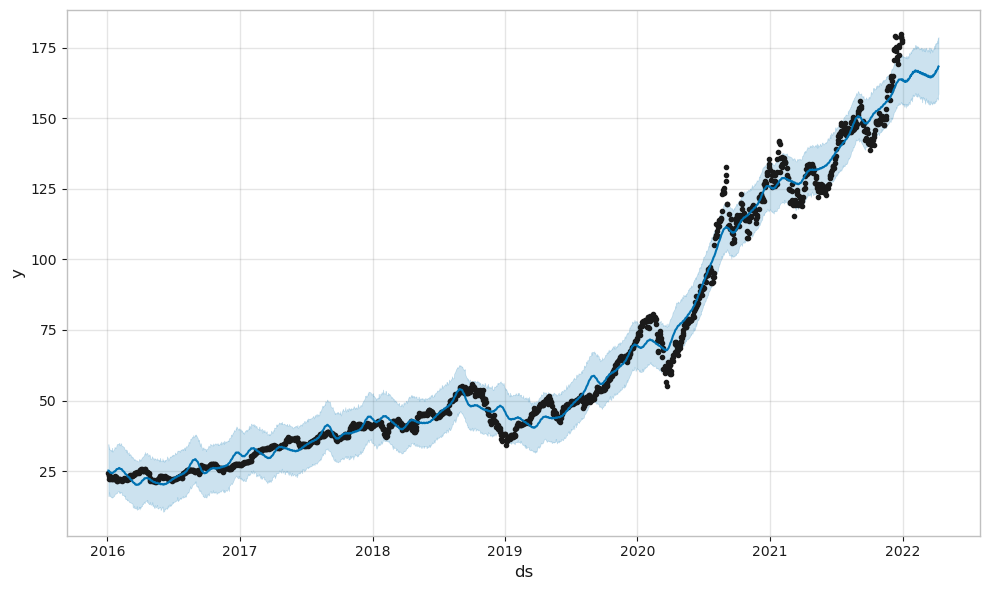

In [906]:
plot1 = m.plot(forecast)

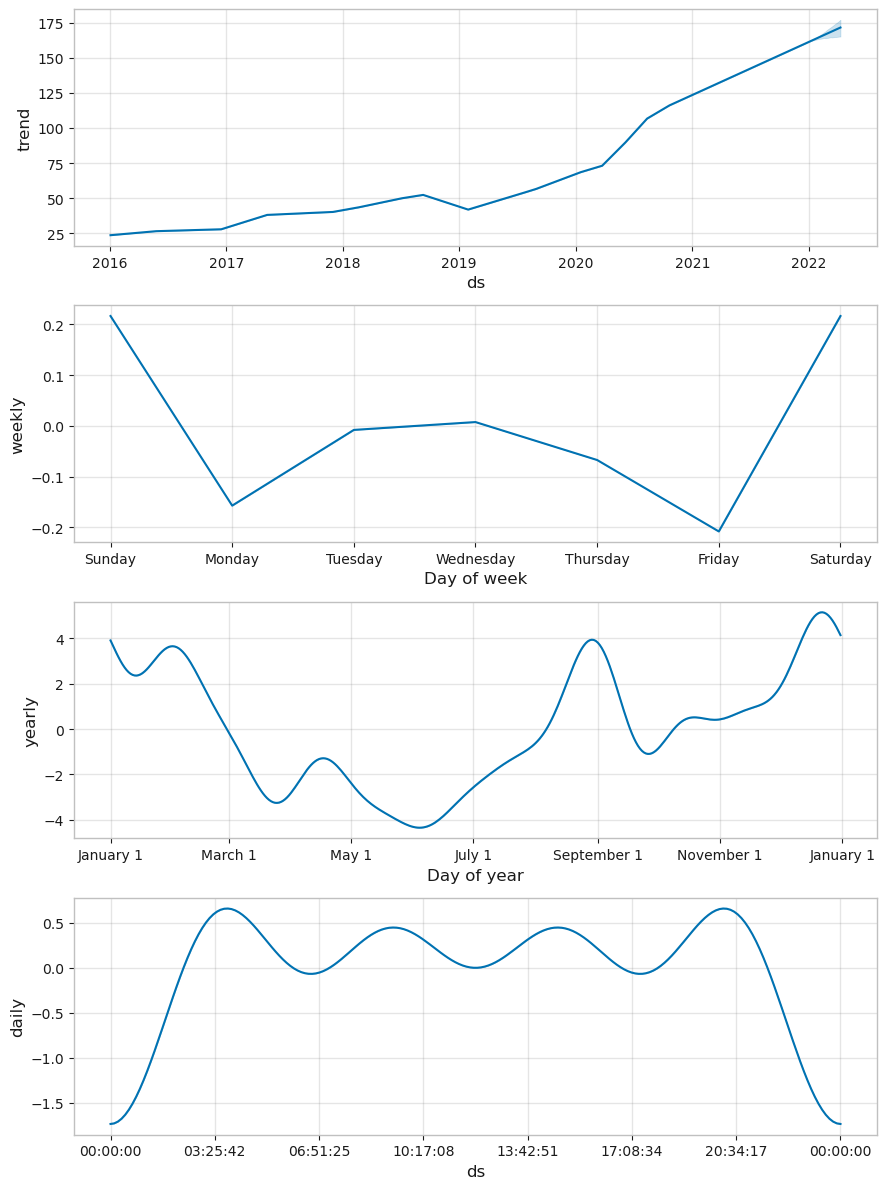

In [907]:
plt2 = m.plot_components(forecast)

# sentiment analysis of the apple stock at finviz 

In [866]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [867]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [868]:
url = 'https://finviz.com/quote.ashx?t=AAPL'

In [869]:
news_tables = {}

In [870]:
req = Request(url=url, headers={'user-agent': 'my-app'})

In [871]:
response = urlopen(req)
print(response)

In [872]:
html = BeautifulSoup(response, features='html.parser')
print(html)

<!DOCTYPE html>

<html lang="en">
<head>
<title>AAPL Apple Inc. Stock Quote</title>
<meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<link href="/assets/dist/finviz.f6728ad6.css" rel="stylesheet" type="text/css"/>
<link href="/assets/dist/main.86fcafbe.css" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png"

In [873]:
news_table = html.find(id="news-table")
news_tables['AAPL'] = news_table

In [874]:
print(news_tables)

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">May-23-22 05:06AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/23/4-dow-stocks-billionaire-money-managers-bought/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">4 Dow Stocks Billionaire Money Managers Bought Hand Over Fist in the First Quarter</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">05:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.bizjournals.com/triangle/news/2022/05/23/raleigh-durham-office-market-overview-q2-2022.html?utm_source=sy&amp;utm

In [875]:
# manipulating finviz data 

In [876]:
news_rows= news_table.findAll('tr')
news_rows

[<tr><td align="right" style="white-space:nowrap" width="130">May-23-22 05:06AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/23/4-dow-stocks-billionaire-money-managers-bought/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">4 Dow Stocks Billionaire Money Managers Bought Hand Over Fist in the First Quarter</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>,
 <tr><td align="right" width="130">05:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.bizjournals.com/triangle/news/2022/05/23/raleigh-durham-office-market-overview-q2-2022.html?utm_source=sy&amp;utm_medium=nsyp&amp;utm_campaign=yh" target="_blank">Office starts to rebound as Triangle remains hot market for grow

In [877]:
#to get the information from the article 
for index,row in enumerate (news_rows):
    title=row.a.text
    timestamp=row.td.text
    print (timestamp,' ',title)

May-23-22 05:06AM     4 Dow Stocks Billionaire Money Managers Bought Hand Over Fist in the First Quarter
05:00AM     Office starts to rebound as Triangle remains hot market for growth
12:50AM     Workers dont want toys or free food, they want a higher quality of life: The Great Resistance is here  as companies struggle to get workers back to the office
May-22-22 10:08PM     Dow Jones Futures Rise After 'Hard' Reality Hits Market; What To Do Now
07:31PM     Dow Jones Futures Rise After 'Hard' Reality Hits Market; What To Do Now
02:28PM     Looking for Tech Stocks? These 3 Are Great Buys.
08:15AM     If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today
07:00AM     3 Stocks Down More Than 75% to Buy Right Now
03:00AM     After Meltdown, Tech-Bottom Signals Have Yet to Scream Buy Now
02:34AM     How Airbnb Is Giving Power to Its People
May-21-22 01:51PM     Better Buy: Apple vs. Alphabet
01:05PM     Apple Looks Closer at India and Vietnam to Boost Production: Repo

In [878]:
parsed_data = []
for index,row in enumerate (news_rows):
    title=row.a.text
    date_data = row.td.text.split(' ')
    if len(date_data) == 1:
            time = date_data[0]
    else:
            date = date_data[0]
            time = date_data[1]
    parsed_data.append(['AAPL', date, time, title])

In [879]:
print(parsed_data)

[['AAPL', 'May-23-22', '05:06AM\xa0\xa0', '4 Dow Stocks Billionaire Money Managers Bought Hand Over Fist in the First Quarter'], ['AAPL', 'May-23-22', '05:00AM\xa0\xa0', 'Office starts to rebound as Triangle remains hot market for growth'], ['AAPL', 'May-23-22', '12:50AM\xa0\xa0', 'Workers dont want toys or free food, they want a higher quality of life: The Great Resistance is here  as companies struggle to get workers back to the office'], ['AAPL', 'May-22-22', '10:08PM\xa0\xa0', "Dow Jones Futures Rise After 'Hard' Reality Hits Market; What To Do Now"], ['AAPL', 'May-22-22', '07:31PM\xa0\xa0', "Dow Jones Futures Rise After 'Hard' Reality Hits Market; What To Do Now"], ['AAPL', 'May-22-22', '02:28PM\xa0\xa0', 'Looking for Tech Stocks? These 3 Are Great Buys.'], ['AAPL', 'May-22-22', '08:15AM\xa0\xa0', 'If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today'], ['AAPL', 'May-22-22', '07:00AM\xa0\xa0', '3 Stocks Down More Than 75% to Buy Right Now'], ['AAPL', 'May

In [880]:
# applying sentiment analysis : take every title and apply sentiment analysis 

In [881]:
df = pd.DataFrame(parsed_data, columns=['AAPL', 'date', 'time', 'title'])
df.head()

,AAPL,date,time,title
0,AAPL,May-23-22,05:06AM,4 Dow Stocks Billionaire Money Managers Bought...
1,AAPL,May-23-22,05:00AM,Office starts to rebound as Triangle remains h...
2,AAPL,May-23-22,12:50AM,"Workers dont want toys or free food, they want..."
3,AAPL,May-22-22,10:08PM,Dow Jones Futures Rise After 'Hard' Reality Hi...
4,AAPL,May-22-22,07:31PM,Dow Jones Futures Rise After 'Hard' Reality Hi...


In [882]:
vader = SentimentIntensityAnalyzer()

In [883]:
print(vader.polarity_scores("I don't think apple is a good company.I think they will do badly." )) # coumpoud between -1 and 1

{'neg': 0.207, 'neu': 0.6, 'pos': 0.193, 'compound': -0.0516}


In [884]:
f = lambda title: vader.polarity_scores(title)['compound'] # lambda fct and i onlt care about coumpound 
df['compound'] = df['title'].apply(f) # apply the fct f on my df specifically titles
df.head()

,AAPL,date,time,title,compound
0,AAPL,May-23-22,05:06AM,4 Dow Stocks Billionaire Money Managers Bought...,0.4939
1,AAPL,May-23-22,05:00AM,Office starts to rebound as Triangle remains h...,0.3818
2,AAPL,May-23-22,12:50AM,"Workers dont want toys or free food, they want...",0.6864
3,AAPL,May-22-22,10:08PM,Dow Jones Futures Rise After 'Hard' Reality Hi...,0.0000
4,AAPL,May-22-22,07:31PM,Dow Jones Futures Rise After 'Hard' Reality Hi...,0.0000


In [885]:
# visualizing sentiment analysis 

In [886]:
df['date'] = pd.to_datetime(df.date).dt.date

<Figure size 1000x800 with 0 Axes>

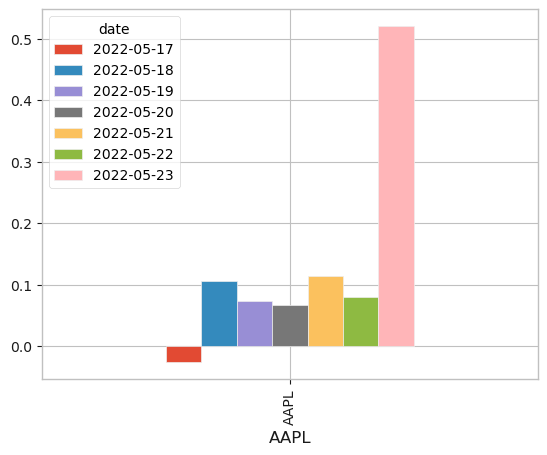

In [887]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['AAPL', 'date']).mean().unstack() # the groupby will return me a dataframe
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()